Consider the attached dataset
IRIS attached below. Load the dataset using the seaborn library function as per the attached link.
1. Estimate the mean and the variance of the four attributes.

2. Arrange the pairs of attributes in the descending order of their correlation coefficients.

3. Repeat the Question 2 above for the 3 different species separately and report the same.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = sns.load_dataset(name='iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#Q1 Estimate the mean and the variance of the four attributes.
#function to calculate the mean value of a column
def avg(col):
  s=0
  for i in col:
    s+=i
  avg1=s/len(col)
  return avg1
def var(col,avg1):
  s=0
  for i in col:
    s+=(i-avg1)**2
  variance=s/len(col)
  return variance
Lst1=[]
Lst1.append(np.round(avg(data['sepal_length']),2))
Lst1.append(np.round(avg(data['sepal_width']),2))
Lst1.append(np.round(avg(data['petal_length']),2))
Lst1.append(np.round(avg(data['petal_width']),2))
Lst2=[]
Lst2.append(np.round(var(data['sepal_length'],avg(data['sepal_length'])),2))
Lst2.append(np.round(var(data['sepal_width'],avg(data['sepal_width'])),2))
Lst2.append(np.round(var(data['petal_length'],avg(data['petal_length'])),2))
Lst2.append(np.round(var(data['petal_width'],avg(data['petal_width'])),2))
column=pd.Series(['sepal_length','sepal_width','petal_length','petal_width'])
mean=pd.Series(Lst1)
variance=pd.Series(Lst2)
df=pd.DataFrame({"COLUMN":column,'MEAN':mean,"VARIANCE":variance})
df

,COLUMN,MEAN,VARIANCE
0,sepal_length,5.84,0.68
1,sepal_width,3.06,0.19
2,petal_length,3.76,3.10
3,petal_width,1.20,0.58


In [ ]:
#Q2 Arrange the pairs of attributes in the descending order of their correlation coefficients.
def summation(col):
  sonly=0
  for i in col:
    sonly+=i
  return sonly
def summation1(x,y):
  s_x_y=0
  for i in range(len(x)):
    s_x_y+=x[i]*y[i]
  return s_x_y
def summation2(x,y):
  s1=0
  s2=0
  for i in range(len(x)):
    s1+=x[i]
    s2+=y[i]
  return s1,s2
def summation3(x,y):
  s3=0
  s4=0
  for i in range(len(x)):
    s3+=x[i]**2
    s4+=y[i]**2
  return s3,s4
def correlation(x,y):
  s1,s2=summation2(x,y)
  s3,s4=summation3(x,y)
  cov=(summation1(x,y)/len(x)-(s1/len(x)*s2/len(x)))
  var_x=np.round(((s3/len(x))-(s1/len(x))**2)**0.5,2)
  var_y=np.round(((s4/len(x))-(s2/len(x))**2)**0.5,2)
  corr=np.round(cov/(var_x*var_y),2)
  return corr
l1=[]
q1=correlation(data['sepal_length'],data['sepal_width'])
q2=correlation(data['sepal_length'],data['petal_length'])
q3=correlation(data['sepal_length'],data['petal_width'])
q4=correlation(data['sepal_width'],data['petal_length'])
q5=correlation(data['sepal_width'],data['petal_width'])
q6=correlation(data['petal_length'],data['petal_width'])
l1.append(q1)
l1.append(q2)
l1.append(q3)
l1.append(q4)
l1.append(q5)
l1.append(q6)
for j in range(1,len(l1)):
  for i in range(len(l1)-j):
    if l1[i]<l1[i+1]:
      l1[i],l1[i+1]=l1[i+1],l1[i]
col1=pd.Series(['(sepal_length,sepal_width)','(sepal_length,petal_length)','(sepal_length,petal_width)','(sepal_width,petal_length)','(sepal_width,petal_width)','(petal_length,petal_width)'])
dataf=pd.DataFrame({'COLUMN':col1,'CORRELATION COEFFICIENT':l1})
dataf

,COLUMN,CORRELATION COEFFICIENT
0,"(sepal_length,sepal_width)",0.96
1,"(sepal_length,petal_length)",0.87
2,"(sepal_length,petal_width)",0.81
3,"(sepal_width,petal_length)",-0.12
4,"(sepal_width,petal_width)",-0.37
5,"(petal_length,petal_width)",-0.43


setosa
                        COLUMN  CORRELATION COEFFICIENT
0   (sepal_length,sepal_width)                     0.73
1  (sepal_length,petal_length)                     0.35
2   (sepal_length,petal_width)                     0.29
3   (sepal_width,petal_length)                     0.27
4    (sepal_width,petal_width)                     0.24
5   (petal_length,petal_width)                     0.18 




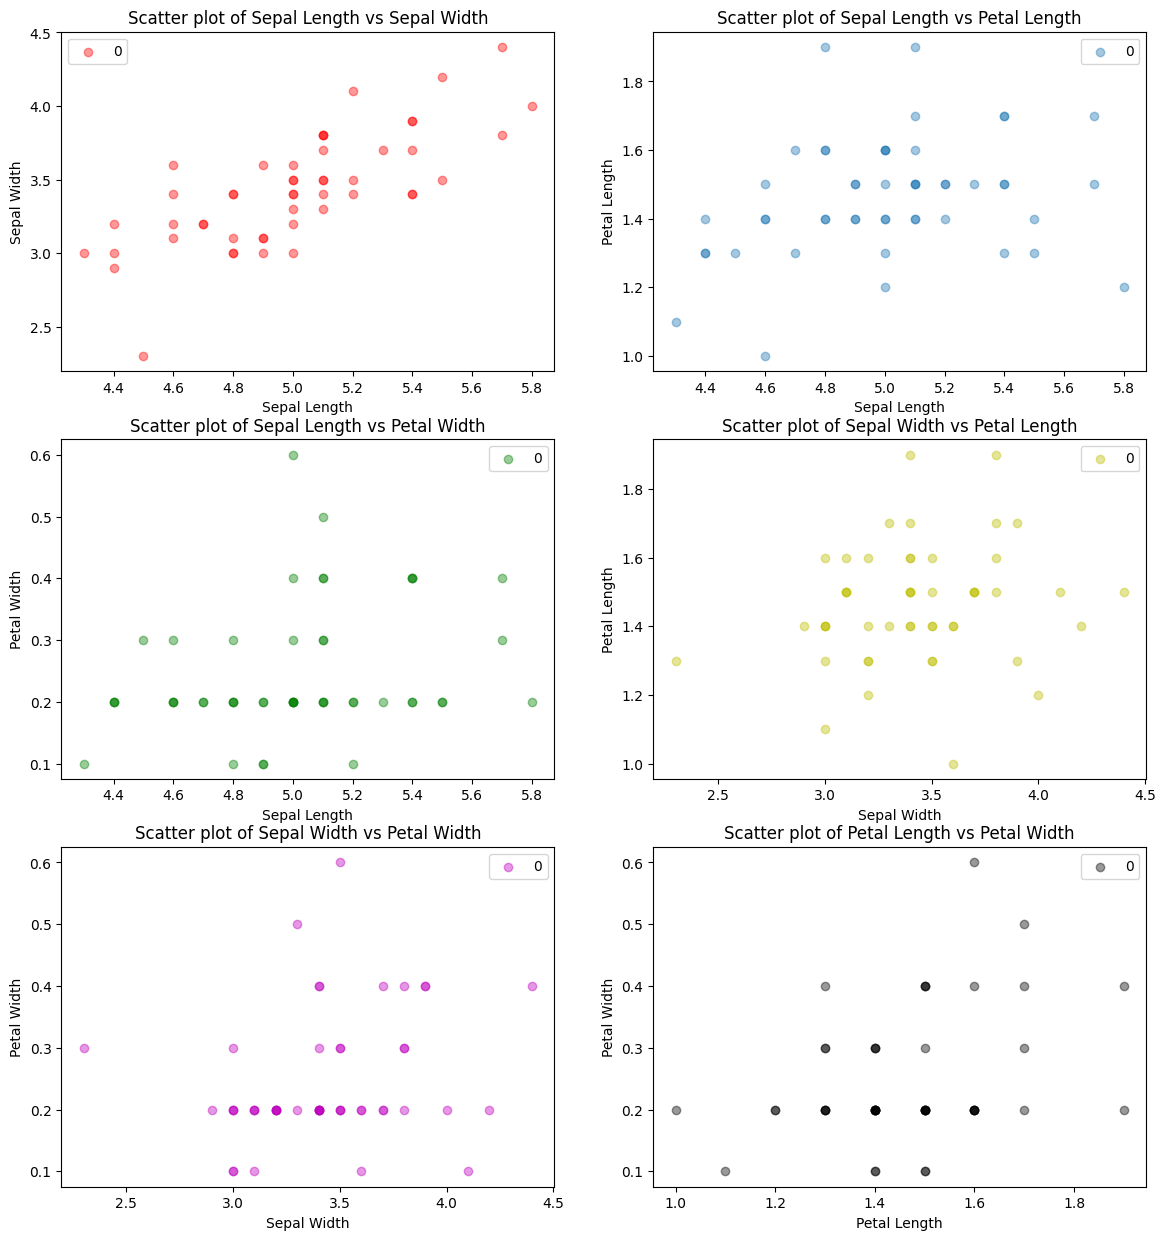

versicolor
                        COLUMN  CORRELATION COEFFICIENT
0   (sepal_length,sepal_width)                     0.76
1  (sepal_length,petal_length)                     0.75
2   (sepal_length,petal_width)                     0.65
3   (sepal_width,petal_length)                     0.56
4    (sepal_width,petal_width)                     0.54
5   (petal_length,petal_width)                     0.53 




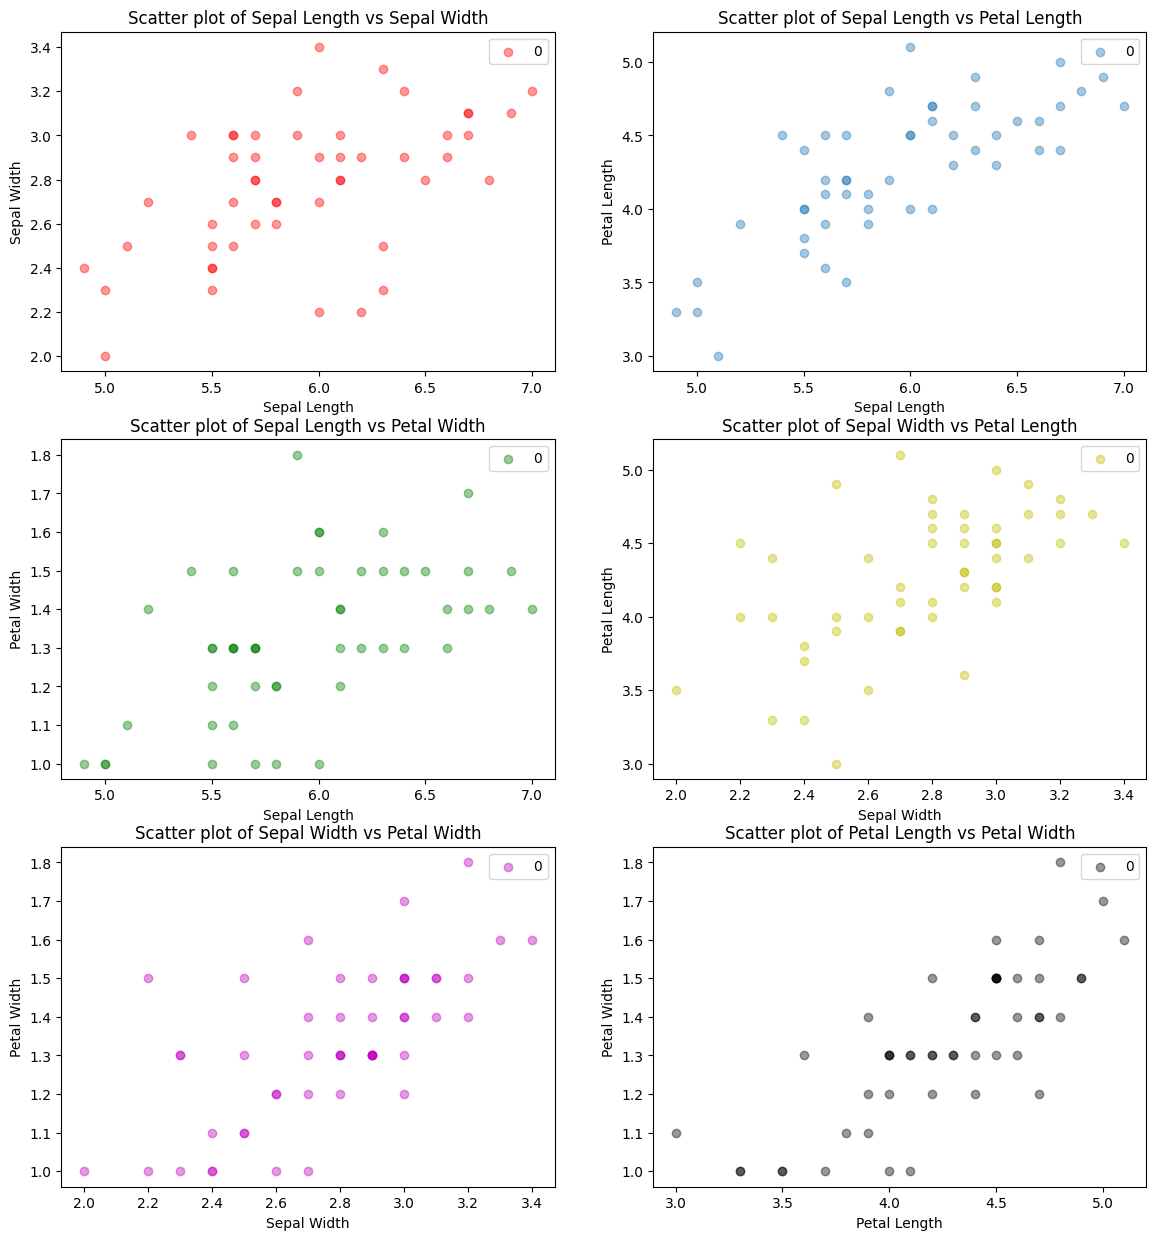

virginica
                        COLUMN  CORRELATION COEFFICIENT
0   (sepal_length,sepal_width)                     0.86
1  (sepal_length,petal_length)                     0.54
2   (sepal_length,petal_width)                     0.46
3   (sepal_width,petal_length)                     0.40
4    (sepal_width,petal_width)                     0.32
5   (petal_length,petal_width)                     0.28 




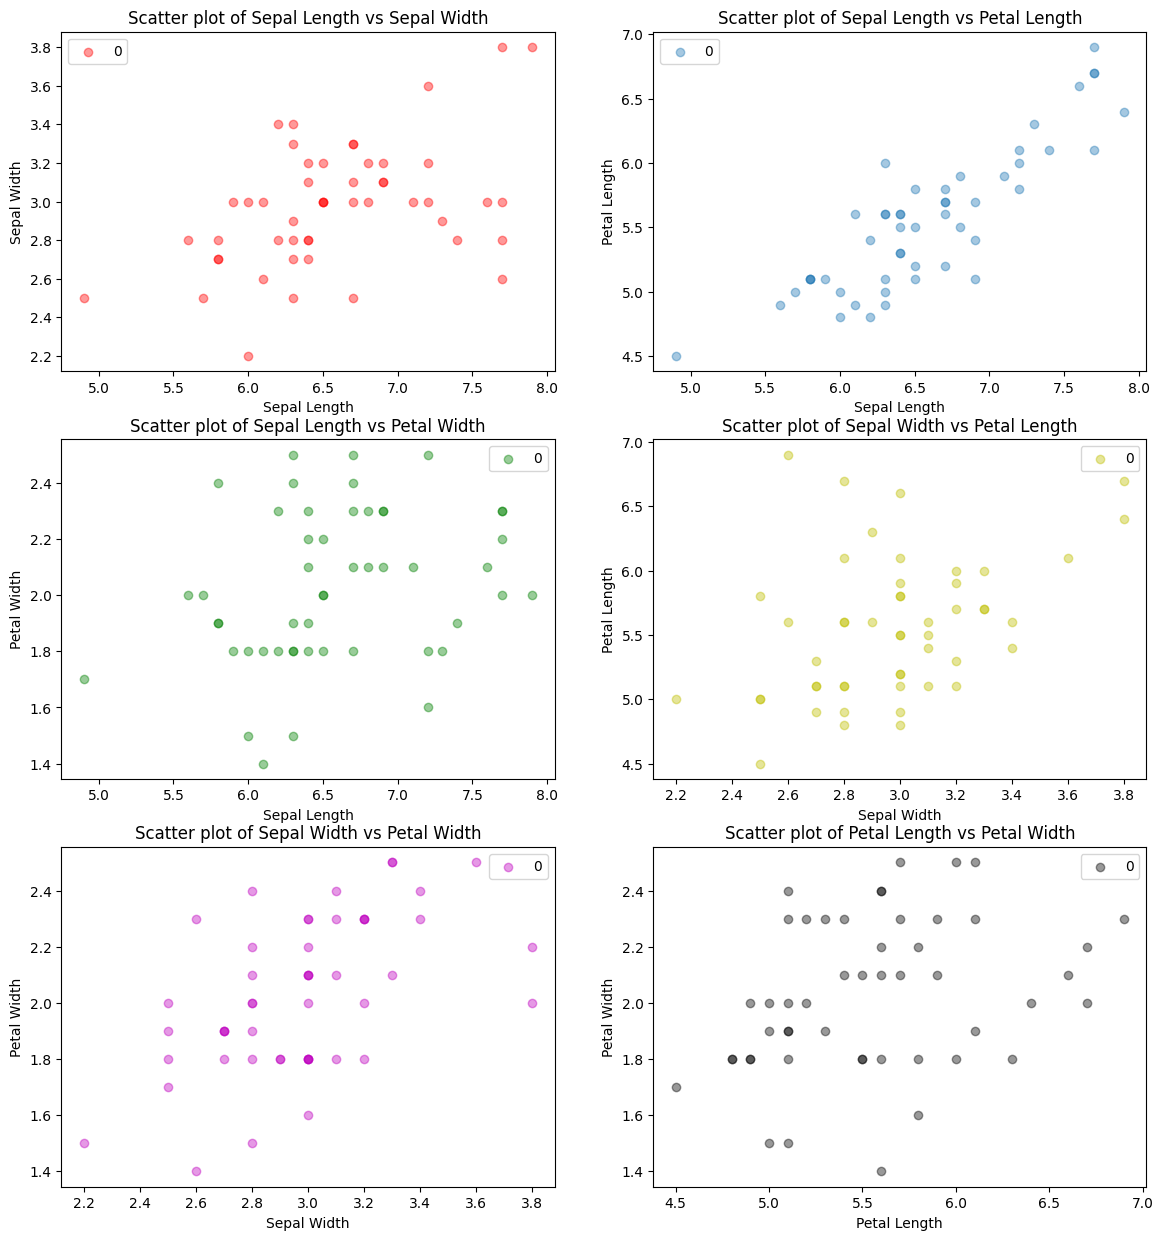

In [ ]:
#Q3 Repeat the Question 2 above for the 3 different species separately and report the same.
species=data['species'].unique()
for i in species:
  print(i)
  l2=[]

  species_data = data[data['species'] == i]
  sepal_length = species_data['sepal_length']
  sepal_width = species_data['sepal_width']
  petal_length=species_data['petal_length']
  petal_width=species_data['petal_width']
  q11=correlation(sepal_length.to_numpy(),sepal_width.to_numpy())
  q12=correlation(sepal_length.to_numpy(),petal_length.to_numpy())
  q13=correlation(sepal_length.to_numpy(),petal_width.to_numpy())
  q14=correlation(sepal_width.to_numpy(),petal_length.to_numpy())
  q15=correlation(sepal_width.to_numpy(),petal_width.to_numpy())
  q16=correlation(petal_length.to_numpy(),petal_width.to_numpy())
  l2.append(q11)
  l2.append(q12)
  l2.append(q13)
  l2.append(q14)
  l2.append(q15)
  l2.append(q16)
  for j in range(1,len(l2)):
    for i in range(len(l2)-j):
      if l2[i]<l2[i+1]:
        l2[i],l2[i+1]=l2[i+1],l2[i]
  col2=pd.Series(['(sepal_length,sepal_width)','(sepal_length,petal_length)','(sepal_length,petal_width)','(sepal_width,petal_length)','(sepal_width,petal_width)','(petal_length,petal_width)'])
  dataf1=pd.DataFrame({'COLUMN':col1,'CORRELATION COEFFICIENT':l2})
  print(dataf1,'\n\n')

  # Plots the scatter graph
  fig,((ax0,ax1),(ax2,ax3),(ax4,ax5))=plt.subplots(3,2,figsize=(14,15))
  ax0.scatter(sepal_length, sepal_width,c="r",label=i,alpha=0.4)
  ax0.set_xlabel('Sepal Length')
  ax0.set_ylabel('Sepal Width')
  ax0.set_title('Scatter plot of Sepal Length vs Sepal Width')
  ax0.legend()
  ax1.scatter(sepal_length,petal_length,label=i,alpha=0.4)
  ax1.set_xlabel('Sepal Length')
  ax1.set_ylabel('Petal Length')
  ax1.set_title('Scatter plot of Sepal Length vs Petal Length')
  ax1.legend()
  ax2.scatter(sepal_length,petal_width,label=i,c="g",alpha=0.4)
  ax2.set_xlabel('Sepal Length')
  ax2.set_ylabel('Petal Width')
  ax2.set_title('Scatter plot of Sepal Length vs Petal Width')
  ax2.legend()
  ax3.scatter(sepal_width, petal_length,c="y",label=i,alpha=0.4)
  ax3.set_xlabel('Sepal Width')
  ax3.set_ylabel('Petal Length')
  ax3.set_title('Scatter plot of Sepal Width vs Petal Length')
  ax3.legend()
  ax4.scatter(sepal_width,petal_width,label=i,c="m",alpha=0.4)
  ax4.set_xlabel('Sepal Width')
  ax4.set_ylabel('Petal Width')
  ax4.set_title('Scatter plot of Sepal Width vs Petal Width')
  ax4.legend()
  ax5.scatter(petal_length,petal_width,label=i,c="k",alpha=0.4)
  ax5.set_xlabel('Petal Length')
  ax5.set_ylabel('Petal Width')
  ax5.set_title('Scatter plot of Petal Length vs Petal Width')
  ax5.legend()
  plt.show()